# Jensen-Shannon Divergence

## Modules

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
from scipy.special import xlogy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/Users/oender/anaconda/envs/meta-meth/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Functions

In [155]:
def entropy(p=None):
    """Entropy (in bits) of a binary probability distribution."""
    
    q = 1 - p
    
    return -np.log2(math.e)*(xlogy(p, p) + xlogy(q, q))

def find_nearest(array, value):
    """Find index of entry that is nearest to value.
    
    source: from http://stackoverflow.com/a/2566508
    """
    
    idx = (np.abs(array - value)).argmin()
    
    return idx

## Templates

In [4]:
texfig = r'''
\centering
\includegraphics[width={WSCALE}\textwidth]{{{FPATH}}}
\caption{{{CAPTION}}}
\label{{fig:{LABEL}}}
'''

## Figure. Jensen-Shannon divergence in terms of Shannon entropy

/Users/oender/anaconda/envs/meta-meth/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


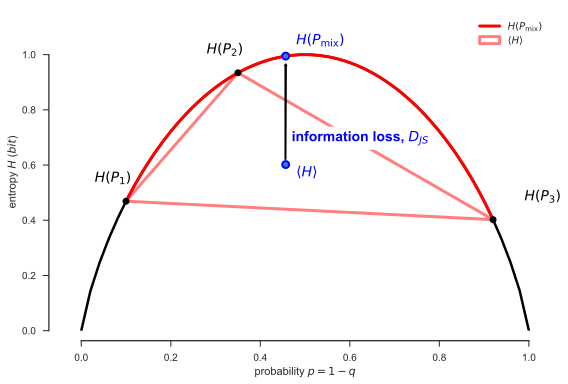

In [199]:
sns.set_style("white")
sns.set_context("paper")
sns.set(style="ticks")

fig_label = 'jsd_entropy'
fig_format = '.svg'
fig_wscale = 1
fig_caption = r'''
    Jensen-Shannon Divergence (JSD) in terms of Shannon entropy.
    The black curve shows the entropy function of a binary PDF in terms of $p=1-q$ and black dots designate three example PDFs (black).
    The locations of the corresponding quantities for calculating JSD depend on the weights but can only lie on the red curve segment and polygon , respectively.
    Blue dots show an example mixture and the corresponding informationn loss.
    '''

output = '../fig/' + fig_label + fig_format

points = np.asarray([.1, .35, .92])
weights = np.ones_like(points)*1/3

fmix = np.dot(points, weights)
hmix = np.dot(entropy(points), weights)

domain = np.linspace(0, 1)
hmix_domain = np.linspace(points[0], points[-1])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(domain, entropy(domain), 'k', linewidth=2.5)
ax.plot(hmix_domain, entropy(hmix_domain), 'r-', linewidth=3, label=r'$H(P_\mathrm{mix})$')

ax.fill(points, entropy(points), 'wo-', edgecolor='r', linewidth=3, alpha=0.5, label=r'$\langle H \rangle$')
#ax.hlines(entropy(points), 0, points, linestyles=u'dashed', alpha=0.3)
#ax.vlines(points, 0, entropy(points), linestyles=u'dashed', alpha=0.3)
#ax.vlines(fmix, 0, entropy(fmix), 'k', linestyles=u'dashed', alpha=0.3)

ax.plot(points, entropy(points), 'ko', linewidth=3)
ax.plot(fmix, hmix, 'o', markeredgecolor='b', markerfacecolor='#377eb8', markeredgewidth=2)
ax.plot(fmix, entropy(fmix), 'o', markeredgecolor='b', markerfacecolor='#377eb8', markeredgewidth=2)

ax.arrow(fmix, hmix+0.02, 0, entropy(fmix)-hmix-0.05, fc='k', length_includes_head=True, lw=2)

for i, (p, h) in enumerate(zip(points, entropy(points))):
    shift = {'x': math.copysign(0.07, p - 0.5), 'y': 0.07}
    ax.text(p + shift['x'], h + shift['y'], r'$H (P_{i})$'.format(i=i+1), fontsize=14, color='k')

ax.text(0.47, 0.43*(hmix+entropy(fmix)), r'information loss, $D_{JS}$',
        fontsize=14, color='b', backgroundcolor='w', weight='bold')
ax.text(0.48, 0.35*(hmix+entropy(fmix)), r'$\langle H \rangle$', fontsize=14, color='b')
ax.text(0.48, 0.65*(hmix+entropy(fmix)), r'$H (P_\mathrm{mix})$', fontsize=14, color='b')

#ax.set_xticks(np.hstack((points, [0, 0.5, 1, fmix])))
#ax.set_xticklabels([r'$P_%i$' % i for i in range(1,4)] + [0, 0.5, 1] + [r'$P_\mathrm{mix}$'])
#ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel(r'probability $p=1-q$')
ax.set_ylim(0, 1.15)
#ax.set_yticks(np.hstack((entropy(points), [0, 1])))
#ax.set_yticklabels([r'$H_%i$' % i for i in range(1,4)] + [0, 1])
#ax.yaxis.set_ticks_position('left')
ax.set_ylabel(r'entropy $H$ ($bit$)')

ax.legend(loc='upper right')
ax.grid(b=False)

sns.despine(offset=10, trim=True)
fig.set_tight_layout(True)
fig.savefig(output)
#plt.close('all')

with open(output.replace(fig_format, '.tex'), 'w') as tex:
    print(texfig.format(WSCALE=fig_wscale,
                        FPATH=fig_label+fig_format,
                        LABEL=fig_label,
                        CAPTION=fig_caption),
          file=tex)

## Figure. JSD/HMIX/MethLevel phase diagram

/Users/oender/anaconda/envs/meta-meth/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


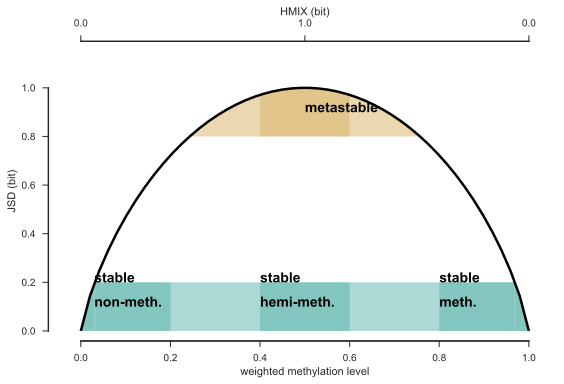

In [198]:
sns.set_style("white")
sns.set_context("paper")
sns.set(style="ticks")

fig_label = 'jsd_phaseDiagram'
fig_format = '.svg'
fig_wscale = 1
fig_caption = r'''
    '''

output = '../fig/' + fig_label + fig_format

ub_jsd = 0.2
lb_jsd = 0.8
lb_met = 0.4
ub_met = 0.6

x = np.linspace(0, 1, num=1000)
y = entropy(x)

# derived quantities
yhigh = np.ma.masked_less(y, lb_jsd)
ylow = np.ma.masked_greater(y, ub_jsd)
xb = x[find_nearest(y, ub_jsd)]

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twiny()

ax.plot(domain, entropy(domain), 'k', linewidth=2.5)

# metastable area
ax.fill_between(x, yhigh, lb_jsd, facecolor='#d8b365', alpha=0.5)
ax.fill_between(x, yhigh, lb_jsd, where=(x > .4) & (x < .6), facecolor='#d8b365', alpha=0.5)
ax.text(0.5, 0.9, 'metastable', fontsize=14, fontweight='bold', color='k')

# stable area
ax.fill_between(x, ylow, 0, facecolor='#5ab4ac', alpha=0.5)
ax.fill_between(x, ub_jsd, 0, where=(x > xb) & (x < (1-xb)), facecolor='#5ab4ac', alpha=0.5)

# ... low and high methylation
ax.fill_between(x, ylow, 0, facecolor='#5ab4ac', alpha=0.5)
ax.fill([xb, xb, 0.2, 0.2], [0, ub_jsd, ub_jsd, 0], alpha=0.5, facecolor='#5ab4ac')
ax.fill([0.8, 0.8, 1 - xb, 1 - xb], [0, ub_jsd, ub_jsd, 0], alpha=0.5, facecolor='#5ab4ac')
ax.text(0.03, 0.2, 'stable', fontsize=14, fontweight='bold', color='k')
ax.text(0.03, 0.1, 'non-meth.', fontsize=14, fontweight='bold', color='k')
ax.text(0.8, 0.2, 'stable', fontsize=14, fontweight='bold', color='k')
ax.text(0.8, 0.1, 'meth.', fontsize=14, fontweight='bold', color='k')

# ... hemimethylation
ax.fill([lb_met, lb_met, ub_met, ub_met], [0, ub_jsd, ub_jsd, 0], alpha=0.5, facecolor='#5ab4ac')
ax.text(0.4, 0.2, 'stable', fontsize=14, fontweight='bold', color='k')
ax.text(0.4, 0.1, 'hemi-meth.', fontsize=14, fontweight='bold', color='k')

vlines = 0
if vlines:
    for pos in [.2,.4,.6,.8]:
        ax.vlines(pos, 0, entropy(pos), linestyles=u'dashed', alpha=0.3)

ax.set_xlabel(r'weighted methylation level')
ax.set_ylim(0, 1.15)
ax.set_ylabel(r'JSD (bit)')

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([0., 0.5, 1.0])
ax2.set_xticklabels([0., 1., 0.])
ax2.set_xlabel(r"HMIX (bit)")

ax.grid(b=False)

sns.despine(offset=10, trim=True, top=False)
fig.set_tight_layout(True)
fig.savefig(output)
#plt.close('all')


In [200]:
plt.close('all')

## Figure. JSD genomic signal from count data

In [344]:
def simcounts(samples, alphabet='EC', positions=10, meancov=5):
    """Simulate read counts"""
    
    read = np.random.poisson(meancov, size=(samples, positions))
    
    prob = np.random.uniform(0, 1, size=(samples, positions))

    count_succ = np.random.binomial(read, prob, size=(samples, positions))
    count_fail = read - count_succ
    
    count = np.hstack([count_succ, count_fail])
    
    return count.reshape(samples, len(alphabet), positions)

def heatmap(counts, alphabet='EC'):
    """"""
    
    sns.set_style()
    
    fig = plt.figure()

    for sample, count in enumerate(counts):
        ax = fig.add_subplot(a.shape[0]*100 + 11 + sample)
        sns.heatmap(count, annot=True, fmt="d", linewidths=2, square=True,
                    cbar=False, xticklabels=False, yticklabels=alphabet)
        plt.setp(ax.get_yticklabels(), rotation=0)
    
    return fig

In [368]:
fig_label = 'jsd_fromCountdata'
fig_format = '.svg'
fig_wscale = 1
fig_caption = r'''
    '''

output = '../fig/' + fig_label + fig_format

a = simcounts(3, positions=30)
fig = heatmap(a)
fig.set_tight_layout(True)
fig.savefig(output)
plt.close('all')

In [369]:
# dummy jsd
fig_label = 'jsd_fromCountdata_signal'
fig_format = '.svg'
fig_wscale = 1
fig_caption = r'''
    '''

output = '../fig/' + fig_label + fig_format

sns.set_style("ticks")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(30), np.random.uniform(0, 1, size=30), marker='o', ms=4, lw=2)
sns.despine(trim=True, offset=10, bottom=True)

fig.set_tight_layout(True)
fig.savefig(output)
plt.close('all')